In [97]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [98]:
data = pd.read_csv('cardio.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [100]:
data = data.drop(columns=['id'])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [101]:
def detect_outliers_iqr(data, features):
    outliers = []
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
        outliers.extend(outlier_indices)
    return list(set(outliers))

# Fitur-fitur kontinu yang akan diidentifikasi outlier
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Mendeteksi outlier dalam dataset
outliers_iqr = detect_outliers_iqr(data, continuous_features)

# Menampilkan baris data yang dianggap sebagai outlier
outliers_data = data.loc[outliers_iqr]
print(outliers_data)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
32769  15251       2     180    71.0    160    110            1     1      0   
65539  22585       2     153   111.0    120     80            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
9      19834       1     164    68.0    110     60            1     1      0   
65547  21221       1     163    88.0     90     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
32733  21129       2     164    70.0     70    100            1     1      0   
32746  14562       2     167    65.0     90     60            1     1      1   
65516  18920       1     156    70.0    180     90            2     3      0   
32750  20259       1     152    53.0    152     53            1     1      0   
65523  21193       2     164    78.0    180     90            1     1      0   

       alco  active  cardio  
32769    

In [102]:
# Menghapus baris yang mengandung outlier dari dataframe
data2 = data.drop(outliers_iqr)

# Menampilkan dataframe setelah penghapusan outlier
print(data2)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
5      21914       1     151    67.0    120     80            2     2      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0        

In [103]:
# sum of duplicated values in the DataFrame
data2.duplicated(keep=False).sum()

48

In [104]:
data_cleaned = data2.drop_duplicates()

In [105]:
# Memeriksa nilai yang di luar dari 0 atau 1 pada fitur biner
binary_features = ['smoke', 'alco', 'active', 'cardio']
for feature in binary_features:
    outlier_indices = data_cleaned[~data_cleaned[feature].isin([0, 1])].index
    if len(outlier_indices) > 0:
        print(f"Outlier ditemukan pada fitur {feature}:")
        print(data_cleaned.loc[outlier_indices])
    else:
        print(f"Tidak ada outlier pada fitur {feature}.")

Tidak ada outlier pada fitur smoke.
Tidak ada outlier pada fitur alco.
Tidak ada outlier pada fitur active.
Tidak ada outlier pada fitur cardio.


In [106]:
data_cleaned.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [107]:
# Convert age from days to years
data_cleaned['age_years'] = round(data_cleaned['age'] / 365.25)

# Drop the original 'age' column
data_cleaned.drop(columns=['age'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18392\3984421960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_years'] = round(data_cleaned['age'] / 365.25)
C:\Users\User\AppData\Local\Temp\ipykernel_18392\3984421960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['age'], inplace=True)


In [114]:
data_cleaned.head()

,gender,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,age_years,height_meter,weight_kg
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,1.68,62
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,1.56,85
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,1.65,64
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,1.69,82
5,1,151,67.0,120,80,2,2,0,0,0,0,60.0,1.51,67


In [115]:
# feature reduction
data_cleaned['height_meter'] = data_cleaned['height'] / 100
data_cleaned['weight_kg'] = data_cleaned['weight'].astype(int)

# renaming features
data_cleaned = data_cleaned.rename(columns={
    'ap_hi': 'systolic blood pressure',
    'ap_lo': 'diastolic blood pressure',
    'cholesterol': 'cholesterol level',
    'gluc': 'glucose level',
    'alco': 'alcohol intake',
    'cardio': 'cardiovascular illness'
})

data_cleaned.head()

,gender,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,age_years,height_meter,weight_kg
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,1.68,62
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,1.56,85
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,1.65,64
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,1.69,82
5,1,151,67.0,120,80,2,2,0,0,0,0,60.0,1.51,67


In [116]:
df_copy = data_cleaned.copy()
df_copy['body mass index'] = ((df_copy['weight_kg']) / ((df_copy['height_meter']) ** 2)).round().astype(int)

df_copy.drop(columns=['height','weight',], inplace=True)#'height_meter','weight_kg'], inplace=True)
df_copy.sample(n=5)

,gender,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,age_years,height_meter,weight_kg,body mass index
13669,1,110,70,1,1,0,0,1,0,54.0,1.65,77,28
12913,1,120,80,1,1,0,0,1,0,54.0,1.69,67,23
50345,1,118,80,1,1,0,0,1,0,52.0,1.62,58,22
11024,2,160,90,1,1,0,0,1,1,56.0,1.59,58,23
27146,2,120,80,1,1,0,0,0,0,42.0,1.76,62,20


In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_copy)
data_scaled = scaler.transform(df_copy)

# Dataframe baru
data_scaled_df = pd.DataFrame(data_scaled, columns=df_copy.columns)
data_scaled_df.head()

,gender,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,age_years,height_meter,weight_kg,body mass index
0,1.366773,-1.149108,-0.221505,-0.529925,-0.388828,-0.30749,-0.234667,0.493273,-0.988035,-0.500626,0.477132,-0.911160,-1.117924
1,-0.731650,0.949979,1.081495,2.431760,-0.388828,-0.30749,-0.234667,0.493273,1.012110,0.241698,-1.115991,0.962818,1.724433
2,-0.731650,0.250284,-1.524504,2.431760,-0.388828,-0.30749,-0.234667,-2.027274,1.012110,-0.203697,0.078851,-0.748206,-0.680639
3,1.366773,1.649675,2.384495,-0.529925,-0.388828,-0.30749,-0.234667,0.493273,1.012110,-0.797556,0.609892,0.718386,0.412576
4,-0.731650,-0.449412,-0.221505,0.950917,1.372698,-0.30749,-0.234667,-2.027274,-0.988035,0.984023,-1.779792,-0.503774,0.412576


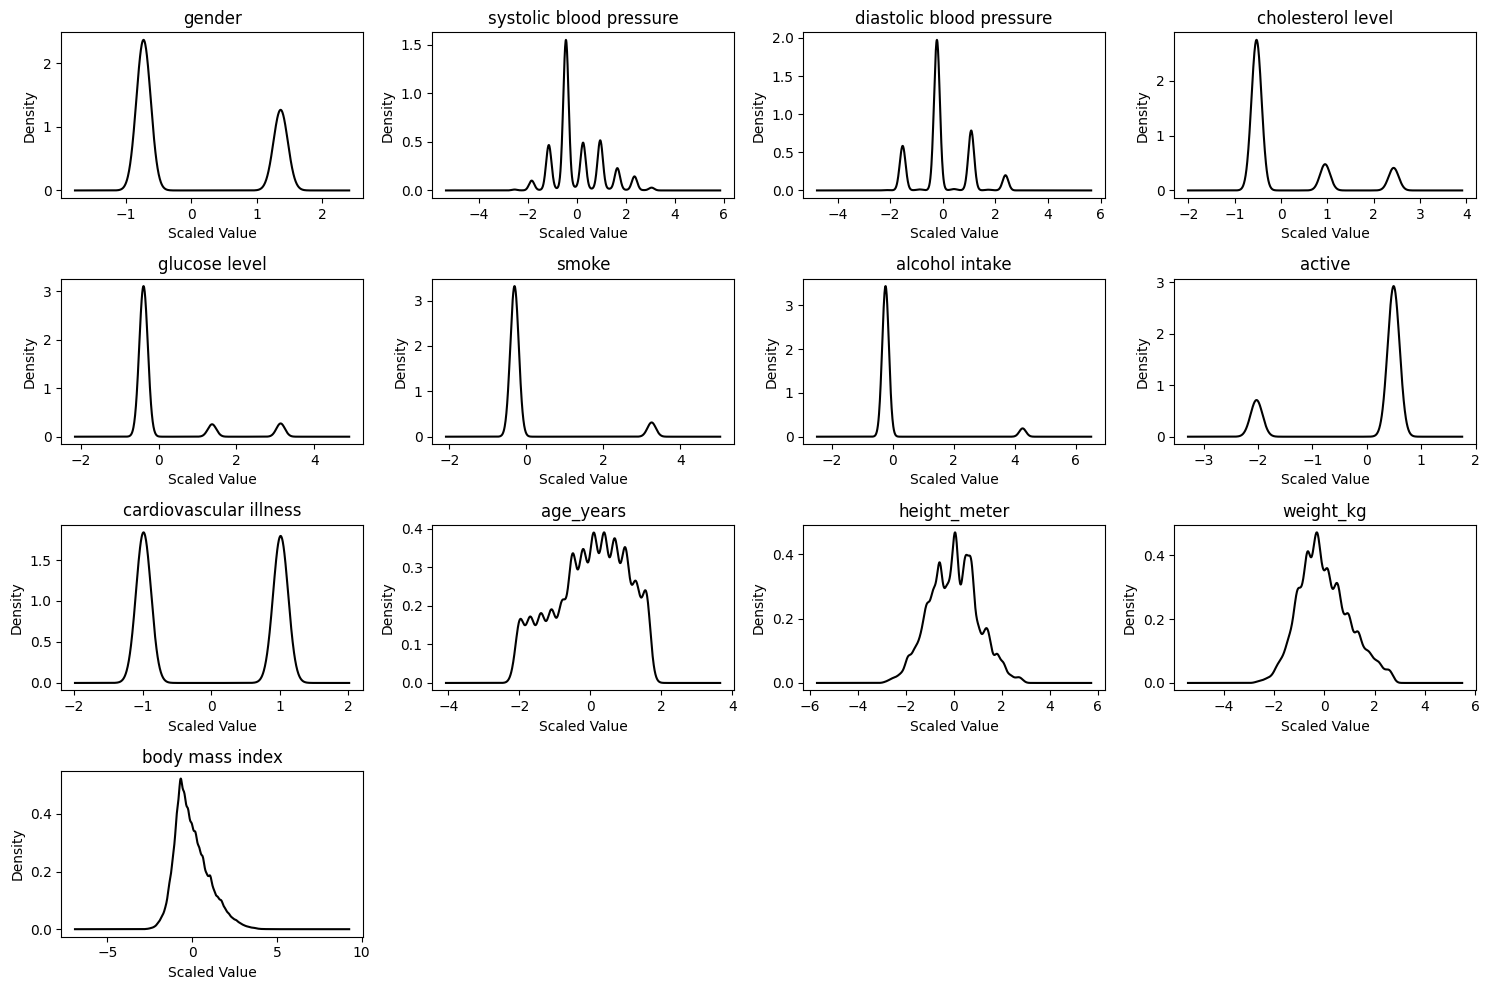

In [118]:
plt.figure(figsize=(15, 10))
for ii, name in enumerate(data_scaled_df.columns):
    plt.subplot(4, 4, ii + 1) 
    data_scaled_df[name].plot(kind='density', color='black', label=name)
    plt.title(name)
    plt.xlabel('Scaled Value')
    plt.ylabel('Density')

plt.tight_layout()  
plt.show()

In [126]:
from sklearn.feature_selection import mutual_info_classif 
from sklearn.preprocessing import LabelEncoder

# Drop kolom tinggi
X = data_scaled_df.drop(columns=['cardiovascular illness', 'weight_kg', 'height_meter'])
y = data_scaled_df['cardiovascular illness']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

mutual_info_scores = mutual_info_classif(X, y)

# Buat DataFrame untuk menyimpan skor fitur
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': mutual_info_scores})

# Urutkan DataFrame berdasarkan skor informasi mutual secara menurun
feature_scores_df = feature_scores_df.sort_values(by='Mutual Information Score', ascending=False)

# Print DataFrame yang telah diurutkan
print(feature_scores_df)

                    Feature  Mutual Information Score
1   systolic blood pressure                  0.112450
2  diastolic blood pressure                  0.065043
8                 age_years                  0.032816
3         cholesterol level                  0.030152
9           body mass index                  0.014273
7                    active                  0.005606
4             glucose level                  0.005109
5                     smoke                  0.004566
0                    gender                  0.004244
6            alcohol intake                  0.002444


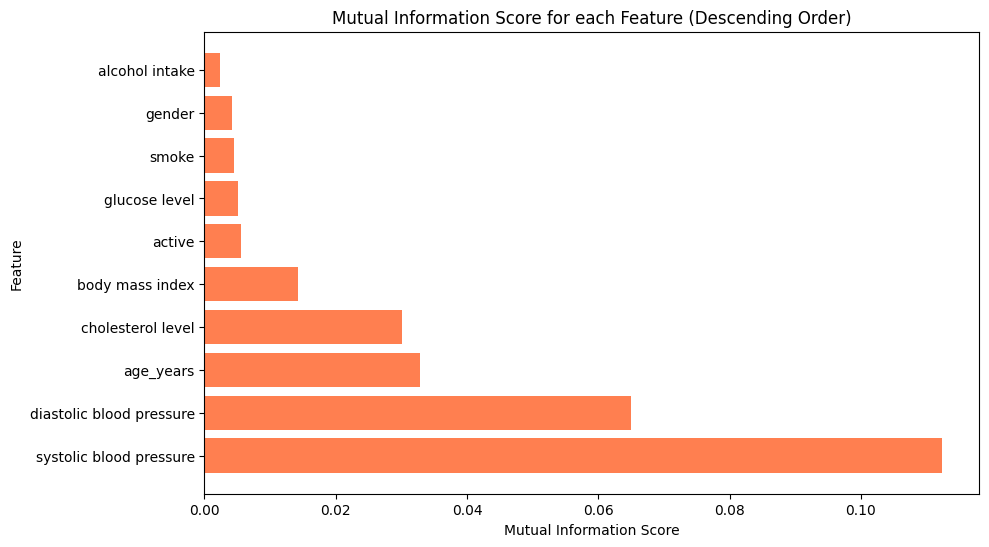

In [127]:
# Plot the features and their mutual information scores
plt.figure(figsize=(10, 6))

plt.barh(feature_scores_df['Feature'], feature_scores_df['Mutual Information Score'], color='coral')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Score for each Feature (Descending Order)')
plt.show()

In [128]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
k = 10

selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]

print("Selected features:", selected_features)

Selected features: Index(['gender', 'systolic blood pressure', 'diastolic blood pressure',
       'cholesterol level', 'glucose level', 'smoke', 'alcohol intake',
       'active', 'age_years', 'body mass index'],
      dtype='object')


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(49982, 10)


In [130]:
print(y_train.shape)

(49982,)


In [131]:
data_scaled_df.describe

<bound method NDFrame.describe of          gender  systolic blood pressure  diastolic blood pressure  \
0      1.366773                -1.149108                 -0.221505   
1     -0.731650                 0.949979                  1.081495   
2     -0.731650                 0.250284                 -1.524504   
3      1.366773                 1.649675                  2.384495   
4     -0.731650                -0.449412                 -0.221505   
...         ...                      ...                       ...   
62473 -0.731650                 0.250284                  1.081495   
62474 -0.731650                 1.649675                 -0.221505   
62475  1.366773                -0.449412                 -0.221505   
62476 -0.731650                 0.600131                 -0.221505   
62477 -0.731650                -0.449412                 -0.221505   

       cholesterol level  glucose level     smoke  alcohol intake    active  \
0              -0.529925      -0.388828 -0.307

In [132]:
from sklearn.svm import LinearSVC

# Inisialisasi model Linear SVC
lsvc_model = LinearSVC(penalty='l2', C=1.0, random_state=1)

# Melatih model pada data training
lsvc_model.fit(X_train, y_train)

y_train_pred_lsvc = lsvc_model.predict(X_train)
y_pred_lsvc = lsvc_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_lsvc = accuracy_score(y_train, y_train_pred_lsvc)
print("Linear SVC Training Accuracy:", accuracy_train_lsvc)

# Evaluasi akurasi pada data testing
accuracy_lsvc = accuracy_score(y_test, y_pred_lsvc)
print("Linear SVC Testing Accuracy:", accuracy_lsvc)

# Evaluasi metrik lainnya untuk data testing
class_report_lsvc = classification_report(y_test, y_pred_lsvc, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report_lsvc)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Training Accuracy: 0.7210795886519147
Linear SVC Testing Accuracy: 0.7286331626120358
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.71      0.80      0.75      6432
     Class 1       0.76      0.65      0.70      6064

    accuracy                           0.73     12496
   macro avg       0.73      0.73      0.73     12496
weighted avg       0.73      0.73      0.73     12496



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [133]:
from sklearn import svm

# Inisialisasi model SVM
svm_model = svm.SVC(random_state=1)

# Melatih model pada data training
svm_model.fit(X_train, y_train)

y_train_pred_svm = svm_model.predict(X_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("SVM Training Accuracy:", accuracy_train_svm)

# Evaluasi akurasi pada data testing
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Testing Accuracy:", accuracy_svm)

# Evaluasi metrik lainnya untuk data testing
class_report_svm = classification_report(y_test, y_pred_svm, target_names=["Class 0", "Class 1"])
print("Classification Report SVM:\n", class_report_svm)


SVM Training Accuracy: 0.72998279380577
SVM Testing Accuracy: 0.7350352112676056
Classification Report SVM:
               precision    recall  f1-score   support

     Class 0       0.72      0.80      0.76      6432
     Class 1       0.76      0.66      0.71      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.73      0.73     12496
weighted avg       0.74      0.74      0.73     12496



In [134]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=1, max_iter=1000)

# Melatih model pada data training
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
print("Logistic Regression Training Accuracy:", accuracy_train_lr)

# Evaluasi akurasi pada data testing
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Testing Accuracy:", accuracy_lr)

# Evaluasi metrik lainnya untuk data testing
class_report_lr = classification_report(y_test, y_pred_lr, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report_lr)


Logistic Regression Training Accuracy: 0.7223400424152695
Logistic Regression Testing Accuracy: 0.7301536491677336
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.71      0.79      0.75      6432
     Class 1       0.75      0.66      0.70      6064

    accuracy                           0.73     12496
   macro avg       0.73      0.73      0.73     12496
weighted avg       0.73      0.73      0.73     12496



In [136]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=1)

# Melatih model pada data training
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_gb = accuracy_score(y_train, y_train_pred_gb)
print("Gradient Boosting Training Accuracy:", accuracy_train_gb)

# Evaluasi akurasi pada data testing
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Testing Accuracy:", accuracy_gb)

# Evaluasi metrik lainnya untuk data testing
class_report_gb = classification_report(y_test, y_pred_gb, target_names=["Class 0", "Class 1"])
print("Classification Report Gradient Boosting:\n", class_report_gb)

Gradient Boosting Training Accuracy: 0.7308230963146732
Gradient Boosting Testing Accuracy: 0.7388764404609475
Classification Report Gradient Boosting:
               precision    recall  f1-score   support

     Class 0       0.73      0.79      0.76      6432
     Class 1       0.75      0.69      0.72      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.74      0.74     12496
weighted avg       0.74      0.74      0.74     12496



In [137]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Melatih model pada data training
nb_model.fit(X_train, y_train)

y_train_pred_nb = nb_model.predict(X_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
print("Naive Bayes Training Accuracy:", accuracy_train_nb)

# Evaluasi akurasi pada data testing
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Testing Accuracy:", accuracy_nb)

# Evaluasi metrik lainnya untuk data testing
class_report = classification_report(y_test, y_pred_nb, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report)

Naive Bayes Training Accuracy: 0.7101756632387659
Naive Bayes Testing Accuracy: 0.7159090909090909
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.69      0.81      0.75      6432
     Class 1       0.75      0.62      0.68      6064

    accuracy                           0.72     12496
   macro avg       0.72      0.71      0.71     12496
weighted avg       0.72      0.72      0.71     12496



In [138]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi model MLPClassifier
mlp_model = MLPClassifier(random_state=1)

# Melatih model pada data training
mlp_model.fit(X_train, y_train)

y_train_pred_mlp = mlp_model.predict(X_train)
y_pred_mlp = mlp_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
print("MLPClassifier Training Accuracy:", accuracy_train_mlp)

# Evaluasi akurasi pada data testing
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLPClassifier Testing Accuracy:", accuracy_mlp)

# Evaluasi metrik lainnya untuk data testing
class_report_mlp = classification_report(y_test, y_pred_mlp, target_names=["Class 0", "Class 1"])
print("Classification Report MLPClassifier:\n", class_report_mlp)


MLPClassifier Training Accuracy: 0.733604097475091
MLPClassifier Testing Accuracy: 0.7367957746478874
Classification Report MLPClassifier:
               precision    recall  f1-score   support

     Class 0       0.73      0.77      0.75      6432
     Class 1       0.74      0.71      0.72      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.74      0.74     12496
weighted avg       0.74      0.74      0.74     12496



In [139]:
from xgboost import XGBClassifier

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Melatih model pada data training
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
print("XGBoost Training Accuracy:", accuracy_train_xgb)

# Evaluasi akurasi pada data testing
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Testing Accuracy:", accuracy_xgb)

# Evaluasi metrik lainnya untuk data testing
class_report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report_xgb)

XGBoost Training Accuracy: 0.747769196910888
XGBoost Testing Accuracy: 0.7339148527528809
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.72      0.78      0.75      6432
     Class 1       0.75      0.68      0.71      6064

    accuracy                           0.73     12496
   macro avg       0.74      0.73      0.73     12496
weighted avg       0.74      0.73      0.73     12496



In [140]:
from sklearn.svm import SVC

# Inisialisasi model SVC
svc_model = SVC(random_state=1)

# Melatih model pada data training
svc_model.fit(X_train, y_train)

y_train_pred_svc = svc_model.predict(X_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_svc = accuracy_score(y_train, y_train_pred_svc)
print("SVC Training Accuracy:", accuracy_train_svc)

# Evaluasi akurasi pada data testing
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Testing Accuracy:", accuracy_svc)

# Evaluasi metrik lainnya untuk data testing
class_report_svc = classification_report(y_test, y_pred_svc, target_names=["Class 0", "Class 1"])
print("Classification Report SVC:\n", class_report_svc)


SVC Training Accuracy: 0.72998279380577
SVC Testing Accuracy: 0.7350352112676056
Classification Report SVC:
               precision    recall  f1-score   support

     Class 0       0.72      0.80      0.76      6432
     Class 1       0.76      0.66      0.71      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.73      0.73     12496
weighted avg       0.74      0.74      0.73     12496



In [141]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model Sequential
model = Sequential()

# Menambahkan layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer untuk mencegah overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model dengan learning rate yang lebih rendah
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan lebih banyak epoch
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi: {accuracy}')

# Prediksi label pada data uji
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Evaluasi model menggunakan classification report
print(classification_report(y_test, y_pred_binary))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6975 - loss: 0.5891 - val_accuracy: 0.7307 - val_loss: 0.5510
Epoch 2/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7236 - loss: 0.5611 - val_accuracy: 0.7312 - val_loss: 0.5485
Epoch 3/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7238 - loss: 0.5609 - val_accuracy: 0.7323 - val_loss: 0.5512
Epoch 4/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7243 - loss: 0.5588 - val_accuracy: 0.7326 - val_loss: 0.5534
Epoch 5/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7233 - loss: 0.5590 - val_accuracy: 0.7329 - val_loss: 0.5508
Epoch 6/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7250 - loss: 0.5543 - val_accuracy: 0.7353 - val_loss: 0.5531
Epoch 7/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7245 - loss: 0.5565 - val_accuracy: 0.7345 - val_loss: 0.5500
Epoch 8/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7263 - loss: 0

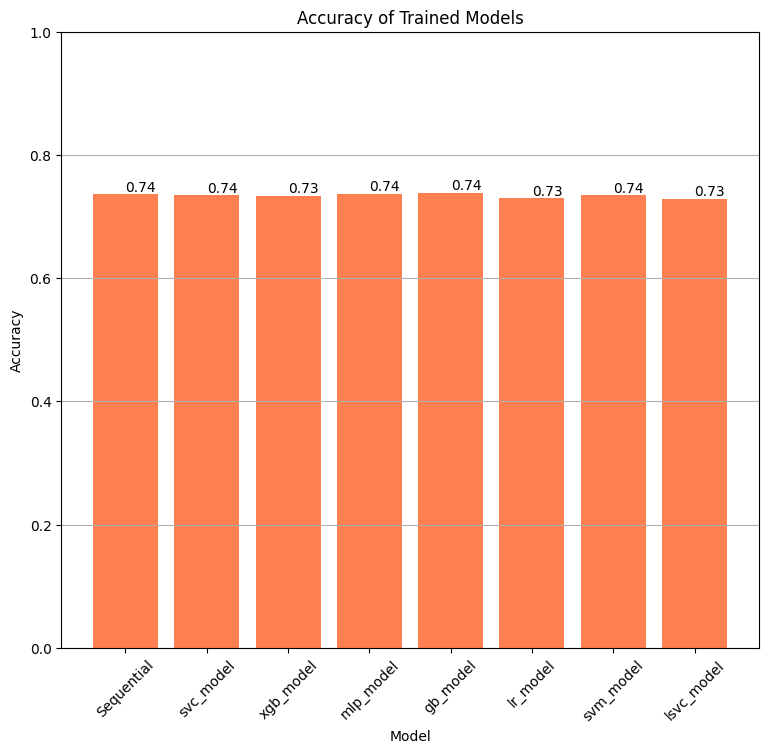

In [142]:
import matplotlib.pyplot as plt

model_names = ['Sequential', 'svc_model', 'xgb_model', 'mlp_model','gb_model','lr_model','svm_model', 'lsvc_model']  
accuracies = [accuracy, accuracy_svc, accuracy_xgb, accuracy_mlp, accuracy_gb, accuracy_lr, accuracy_svm, accuracy_lsvc]  

plt.figure(figsize=(9, 8))
bars = plt.bar(model_names, accuracies, color='coral')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Trained Models')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  
plt.grid(axis='y')  


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


In [143]:
import pickle

# Normalisasi fitur pada data pelatihan
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Simpan scaler ke dalam file pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Memuat scaler dari file pickle
with open('scaler.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)

In [144]:
# Simpan model dalam format H5
model.save("model.h5")

In [145]:
# Simpan model ke file .pkl
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [146]:
# Simpan model ke file .pkl
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp_model, file)